In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Predict buying price given 

    Maintenance = High 
    Number of doors = 4 
    Lug Boot Size = Big 
    Safety = High 
    Class Value = Good

In [2]:
#import data from file
car_data = pd.read_csv('car.data', delimiter=",")

In [3]:
#take a look at data
car_data.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


For this task, we will be trying to predict the buying value

    buying:   vhigh, high, med, low.

given the following attributes 

    maint:    vhigh, high, med, low.
    doors:    2, 3, 4, 5more.
    persons:  2, 4, more.
    lug_boot: small, med, big.
    safety:   low, med, high.
    class:    unacc, acc, good, vgood

In [4]:
#start by changing column names 
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
car_data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,5more,4,med,med,unacc
freq,432,432,432,576,576,576,1209


<AxesSubplot:>

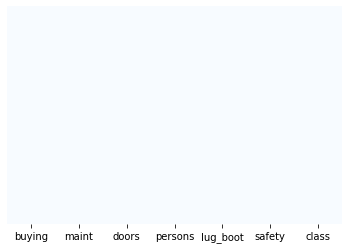

In [7]:
#look for nan values in our dataset
sns.heatmap(car_data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

We shall start by assigning the values of buying as such

    vhigh   : 4
    high    : 3
    med     : 2
    low     : 1

In [8]:
car_data['buying'] = car_data['buying'].replace(to_replace=['vhigh', 'high', 'med', 'low'], value=[4, 3, 2, 1])
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,vhigh,2,2,small,med,unacc
1,4,vhigh,2,2,small,high,unacc
2,4,vhigh,2,2,med,low,unacc
3,4,vhigh,2,2,med,med,unacc
4,4,vhigh,2,2,med,high,unacc


In [9]:
#Split data into X and y, at the same time, the column persons is no longer needed
y = car_data['buying']
X = car_data[['maint', 'doors', 'lug_boot', 'safety', 'class']]

In [10]:
#as all the columns consist of catagorical variables, we can convert them into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)
X.head(10)

,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,lug_boot_med,lug_boot_small,safety_low,safety_med,class_good,class_unacc,class_vgood
0,0,0,1,0,0,0,0,1,0,1,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,1,0,0,1,0
3,0,0,1,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,1,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,1,0,0,1,0
6,0,0,1,0,0,0,0,0,0,1,0,1,0
7,0,0,1,0,0,0,0,0,0,0,0,1,0
8,0,0,1,0,0,0,0,1,1,0,0,1,0
9,0,0,1,0,0,0,0,1,0,1,0,1,0


<AxesSubplot:>

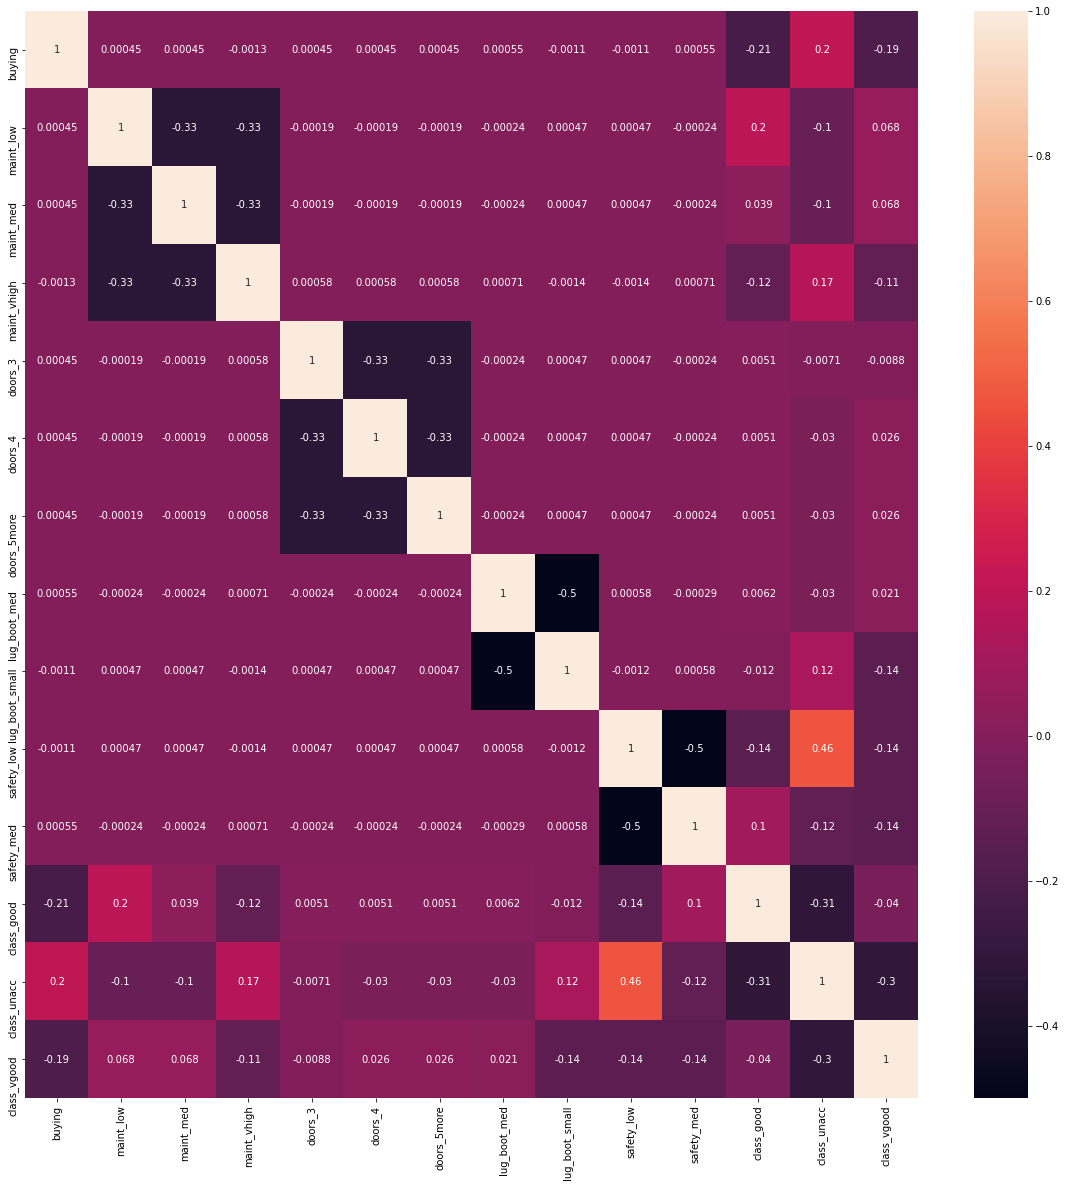

In [11]:
#looking at the correlation between the various features and classifier
new_df = pd.concat([y, X], axis = 1)
correlations = new_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

With such low correlation, it might be hard to get a decent accuracy for our model. We shall try several different models, starting with random forest

In [12]:
#split dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32)

In [13]:
#import and run a random forest classifier
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [14]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.16570327552986513


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[25, 35, 30, 32],
       [47, 12, 32, 37],
       [22, 30, 17, 63],
       [19, 26, 60, 32]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.22      0.20      0.21       122
           2       0.12      0.09      0.10       128
           3       0.12      0.13      0.13       132
           4       0.20      0.23      0.21       137

    accuracy                           0.17       519
   macro avg       0.16      0.17      0.16       519
weighted avg       0.16      0.17      0.16       519



We had a very low accuracy with random forest(around 15%), we shall try with another model, Linear SVC

In [17]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(verbose=0)

lsvc.fit(X_train, y_train)
y_pred=lsvc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.31021194605009633


In [18]:
confusion_matrix(y_test, y_pred)

array([[40, 23, 10, 49],
       [43, 25, 11, 49],
       [15, 32, 19, 66],
       [17, 22, 21, 77]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.35      0.33      0.34       122
           2       0.25      0.20      0.22       128
           3       0.31      0.14      0.20       132
           4       0.32      0.56      0.41       137

    accuracy                           0.31       519
   macro avg       0.31      0.31      0.29       519
weighted avg       0.31      0.31      0.29       519



The Linear SVM model performed much better, almost two times as good at around 30% accuracy. We proceed to see if we can get a better accuracy when we use an ANN model

In [20]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

We shall build an ANN with (13 + 1) / 2 = 7 nodes in the hidden layers

In [21]:
classifier = Sequential()
classifier.add(Dense(units = 7, kernel_initializer='glorot_uniform', activation = 'relu', input_dim = 13))
classifier.add(Dense(units = 7, kernel_initializer='glorot_uniform', activation = 'relu'))
classifier.add(Dense(units = 7, kernel_initializer='glorot_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
121/121 [==============================] - 0s 608us/step - loss: 0.1491 - accuracy: 0.2644
Epoch 2/100
121/121 [==============================] - 0s 600us/step - loss: -7.9303 - accuracy: 0.2469
Epoch 3/100
121/121 [==============================] - 0s 618us/step - loss: -79.3250 - accuracy: 0.2531
Epoch 4/100
121/121 [==============================] - 0s 633us/step - loss: -389.9419 - accuracy: 0.2661
Epoch 5/100
121/121 [==============================] - 0s 617us/step - loss: -1264.5037 - accuracy: 0.2784
Epoch 6/100
121/121 [==============================] - 0s 592us/step - loss: -3023.6959 - accuracy: 0.2869
Epoch 7/100
121/121 [==============================] - 0s 625us/step - loss: -6336.8891 - accuracy: 0.2773
Epoch 8/100
121/121 [==============================] - 0s 592us/step - loss: -12056.3070 - accuracy: 0.2398
Epoch 9/100
121/121 [==============================] - 0s 602us/step - loss: -19593.9617 - accuracy: 0.2508
Epoch 10/100
121/121 [=======================

121/121 [==============================] - 0s 583us/step - loss: -31766161.8197 - accuracy: 0.2562
Epoch 76/100
121/121 [==============================] - 0s 583us/step - loss: -33885633.4180 - accuracy: 0.2337
Epoch 77/100
121/121 [==============================] - 0s 575us/step - loss: -35405690.8689 - accuracy: 0.2541
Epoch 78/100
121/121 [==============================] - 0s 580us/step - loss: -36090854.6557 - accuracy: 0.2433
Epoch 79/100
121/121 [==============================] - 0s 592us/step - loss: -38038706.8033 - accuracy: 0.2388
Epoch 80/100
121/121 [==============================] - 0s 592us/step - loss: -37898961.1475 - accuracy: 0.2726
Epoch 81/100
121/121 [==============================] - 0s 567us/step - loss: -41328844.4918 - accuracy: 0.2479
Epoch 82/100
121/121 [==============================] - 0s 558us/step - loss: -42968200.0656 - accuracy: 0.2394
Epoch 83/100
121/121 [==============================] - 0s 575us/step - loss: -43721949.5738 - accuracy: 0.2607
Epoch

In [22]:
y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2350674373795761


In [23]:
confusion_matrix(y_test, y_pred)

array([[122,   0,   0,   0],
       [128,   0,   0,   0],
       [132,   0,   0,   0],
       [137,   0,   0,   0]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.24      1.00      0.38       122
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00       137

    accuracy                           0.24       519
   macro avg       0.06      0.25      0.10       519
weighted avg       0.06      0.24      0.09       519



C:\Users\chenj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It appears that ANN is a poor model for this data, it gives the same classification to each and every entry

We shall use our Linear SVM model for our prediction for the following features: 
    
    Maintenance = High 
    Number of doors = 4 
    Lug Boot Size = Big 
    Safety = High 
    Class Value = Good
    
To make it as accurate as possible, we shall retrain our linear SVM model using the full dataset

In [25]:
X1 = pd.DataFrame([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])
X1 = X1.T
X1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [26]:
lsvc_2 = LinearSVC(verbose=0)
lsvc_2.fit(X, y)
print(lsvc_2.predict(X1))

[1]


From our model, we predict that this is a car with a low buying value